# Denoising Autoencoder

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import zipfile as zip

In [ ]:
import tensorflow as tf
import numpy as np

### Reading data as image and storing it into training, validation and testing

In [ ]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):

        if i != ".DS_Store":
            for j in os.listdir(train_path+"/"+i):
                tr_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                tr_out.append(i)

            for j in os.listdir(test_path+"/"+i):
                test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                test_out.append(i)

            for j in os.listdir(validation_path+"/"+i):
                val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                val_out.append(i)
                
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

    return tr_data, test_data, val_data, tr_out, test_out, val_out



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = zip.ZipFile("/content/drive/MyDrive/Group_22.zip",'r')
folder.extractall("content/drive/MyDrive/G22")

In [ ]:
path = "/content/content/drive/MyDrive/G22/Group_22"
tr_data, test_data, val_data, tr_out, test_out, val_out = read_data(path)


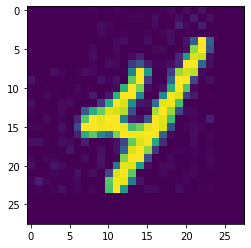

In [ ]:
plt.imshow(tr_data[0])

# Noisy autoencoder single hidden layer model

In [ ]:
tr_data = tr_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

tr_data = tr_data[..., tf.newaxis]
test_data = test_data[..., tf.newaxis]

print(tr_data.shape)

(11385, 28, 28, 1)


In [ ]:
noise_factor = 0.2
noisy_tr = tr_data + noise_factor * tf.random.normal(shape=tr_data.shape) 
noisy_test = test_data + noise_factor * tf.random.normal(shape=test_data.shape) 

noisy_tr = tf.clip_by_value(noisy_tr, clip_value_min=0., clip_value_max=1.)
noisy_test = tf.clip_by_value(noisy_test, clip_value_min=0., clip_value_max=1.)

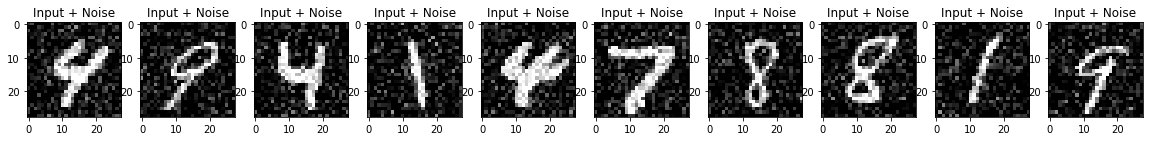

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    k = np.random.randint(1, 3500)
    ax = plt.subplot(1, n, i+1)
    plt.title("Input + Noise")
    plt.imshow(tf.squeeze(noisy_test[k]), cmap='gray')
plt.show()

### Generating Model

In [ ]:
class NoisyAutoencoder(tf.keras.models.Model):
  
    def __init__(self):
        
        super(NoisyAutoencoder, self).__init__()
        
        self.encoder = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
          tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_1')])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(784, activation='sigmoid', name='Output_Layer'),
            tf.keras.layers.Reshape((28, 28))])
          

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

noisyautoenoder = NoisyAutoencoder()

In [ ]:
noisyautoenoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = noisyautoenoder.fit(noisy_tr, tr_data, epochs=10000, batch_size=1, callbacks=callback)

'''
noisyautoenoder.fit(noisy_tr, tr_data,
                epochs=10,
                shuffle=True,
                validation_data=(noisy_test, test_data))
'''

Epoch 1/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.0160
Epoch 2/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.0070
Epoch 3/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.0056
Epoch 4/10000
11385/11385 [==============================] - 39s 3ms/step - loss: 0.0049
Epoch 5/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.0045
Epoch 6/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.0042
Epoch 7/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.0040
Epoch 8/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.0038
Epoch 9/10000
11385/11385 [==============================] - 39s 3ms/step - loss: 0.0036
Epoch 10/10000
11385/11385 [==============================] - 36s 3ms/step - loss: 0.0035
Epoch 11/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.0034
Epoch 12/10000
1138

'\nnoisyautoenoder.fit(noisy_tr, tr_data,\n                epochs=10,\n                shuffle=True,\n                validation_data=(noisy_test, test_data))\n'

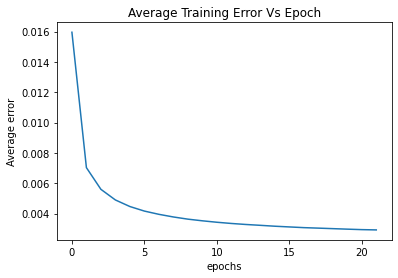

In [ ]:
#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
#plt.savefig("/Users/rajeshr/Desktop/errorvsepoch"+str(np.random.randint(1, 100000))+".png")
plt.show()

In [ ]:
noisyautoenoder.encoder.summary()
noisyautoenoder.decoder.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_Layer (Dense)        (1, 784)                  201488    
                                                                 
 reshape_4 (Reshape)         (1, 28, 28)               0         
                                                                 
Total params: 201,488
Tr

In [ ]:
encoded_imgs = noisyautoenoder.encoder(noisy_test).numpy()
decoded_imgs = noisyautoenoder.decoder(encoded_imgs).numpy()

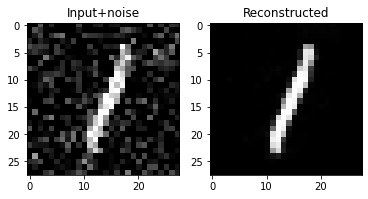

In [ ]:
k = np.random.randint(1, 3500)

plt.subplot(1, 2, 1)
plt.title("Input+noise")
plt.imshow(tf.squeeze(noisy_test[k]), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed")
plt.imshow(tf.squeeze(decoded_imgs[k]), cmap='gray')

#plt.savefig("/Users/rajeshr/Desktop/output"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Weight visualization

In [ ]:
from keras import get_activations, display_activations

In [ ]:
input_sample = test_data[:1]

activations = get_activations(encoder, input_sample)
display_activations(activations, cmap="gray", save=False)

In [ ]:
weight1 = noisyautoenoder.layers[0].get_weights()
weight1[0].shape
#weight1

(784, 256)

In [ ]:
weight2 = noisyautoenoder.layers[1].get_weights()
weight2[0].shape

(256, 784)

In [ ]:
w1 = []

for w in weight1[0].T:
    w1.append(w.reshape(28, 28))
    
w1 = np.array(w1)
w1.shape

(256, 28, 28)

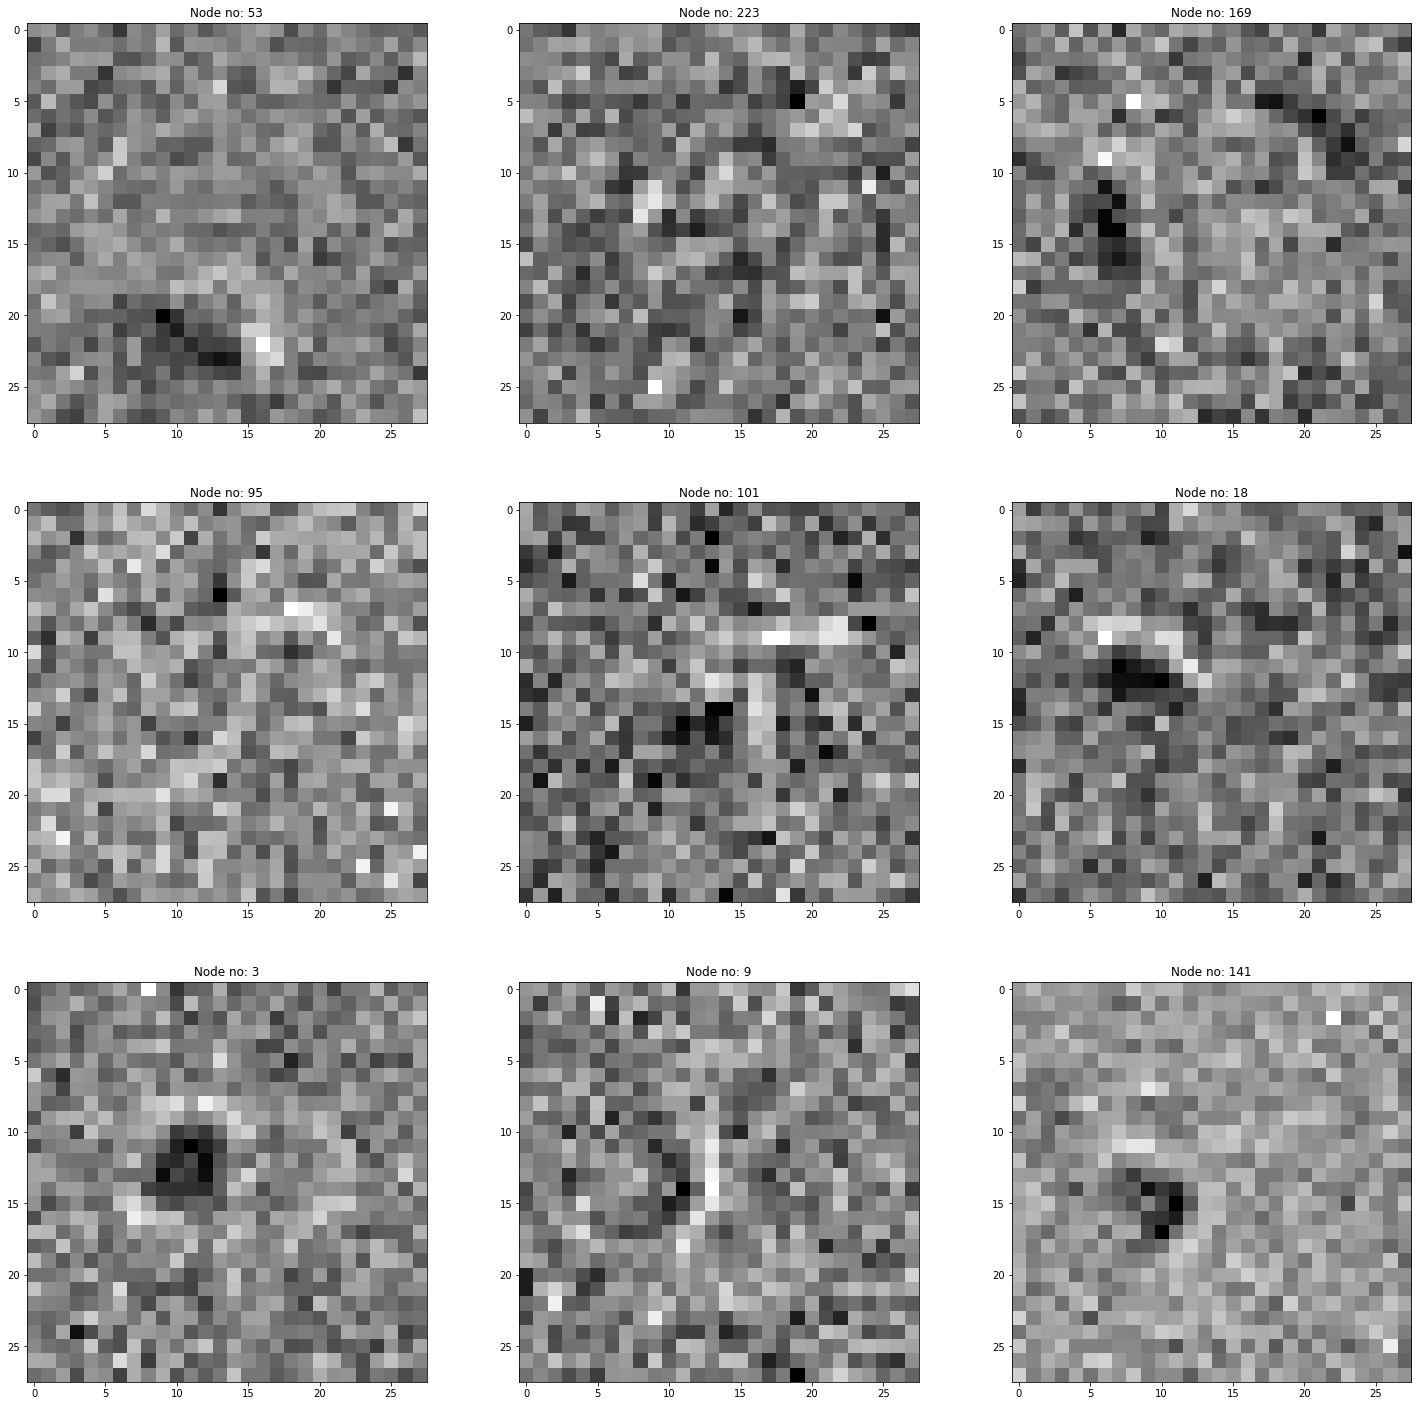

In [ ]:
n = 9
plt.figure(figsize=(25, 25))
for i in range(n):
    k = np.random.randint(0, 256)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w1[k], cmap='gray')
    
#plt.savefig("/Users/rajeshr/Desktop/weightvisualization"+str(np.random.randint(1, 100000))+".png")
plt.show()

In [ ]:
w2 = []

for w in weight2[0]:
    w2.append(w.reshape(28, 28))
    
w2 = np.array(w2)
w2.shape

(256, 28, 28)

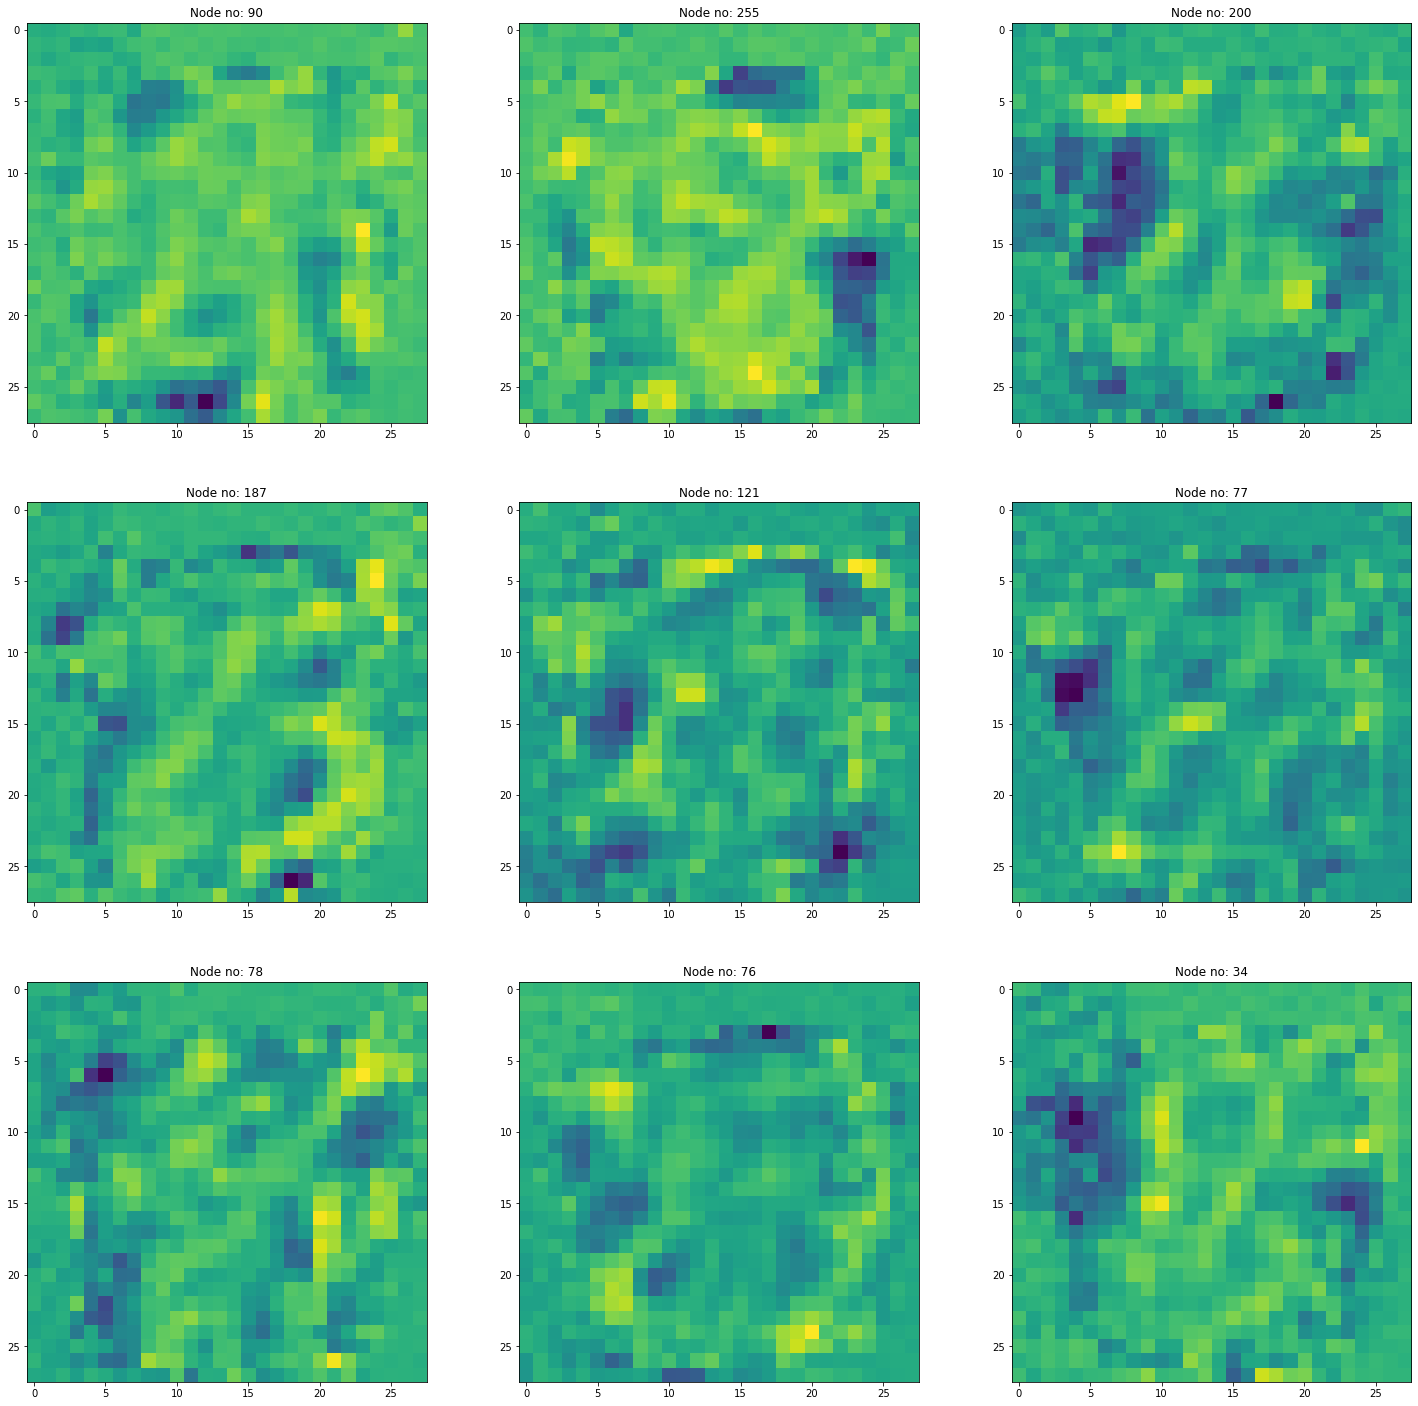

In [ ]:
n = 9
plt.figure(figsize=(25, 25))
for i in range(n):
    k = np.random.randint(0, 256)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w2[k])
    
#plt.savefig("/Users/rajeshr/Desktop/weightvisualization"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Classification

In [ ]:
encoded_tr = noisyautoenoder.encoder(noisy_tr).numpy()
decoded_tr = noisyautoenoder.decoder(encoded_imgs).numpy()
from tensorflow.keras.utils import  to_categorical

encoded_val=noisyautoenoder.encoder(val_data).numpy()

In [ ]:
y_train=to_categorical(tr_out)
y_val=to_categorical(val_out)
y_test=to_categorical(test_out)

classifier

In [ ]:
encoded_tr_1 = noisyautoenoder.encoder(tr_data).numpy()

In [ ]:

classifier = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(1024, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
classifier.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = classifier.fit(encoded_tr_1, y_train, epochs=100, validation_data=(encoded_val,y_val),callbacks=callback)



Epoch 1/100
356/356 [==============================] - 7s 18ms/step - loss: 0.5284 - accuracy: 0.7973 - val_loss: 0.4204 - val_accuracy: 0.8522
Epoch 2/100
356/356 [==============================] - 6s 15ms/step - loss: 0.1906 - accuracy: 0.9376 - val_loss: 0.2559 - val_accuracy: 0.9217
Epoch 3/100
356/356 [==============================] - 6s 16ms/step - loss: 0.1716 - accuracy: 0.9452 - val_loss: 0.2212 - val_accuracy: 0.9241
Epoch 4/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1556 - accuracy: 0.9495 - val_loss: 0.2513 - val_accuracy: 0.9167
Epoch 5/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1346 - accuracy: 0.9548 - val_loss: 0.2584 - val_accuracy: 0.9181
Epoch 6/100
356/356 [==============================] - 6s 16ms/step - loss: 0.1248 - accuracy: 0.9585 - val_loss: 0.2454 - val_accuracy: 0.9212
Epoch 7/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1005 - accuracy: 0.9673 - val_loss: 0.2439 - val_accuracy:

In [ ]:
encoded_val = noisyautoenoder.encoder(val_data).numpy()


In [ ]:
loss, mse = classifier.evaluate(encoded_val, y_val)

119/119 [==============================] - 1s 5ms/step - loss: 0.8529 - accuracy: 0.8443


classifer 2

classifier 3

In [ ]:
classifier2 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(1024, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
classifier2.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = classifier2.fit(encoded_tr, y_train, epochs=100, validation_data=(encoded_val,y_val),callbacks=callback)

Epoch 1/100
356/356 [==============================] - 6s 15ms/step - loss: 0.5450 - accuracy: 0.7903 - val_loss: 0.2817 - val_accuracy: 0.9033
Epoch 2/100
356/356 [==============================] - 5s 15ms/step - loss: 0.2322 - accuracy: 0.9169 - val_loss: 0.2625 - val_accuracy: 0.9117
Epoch 3/100
356/356 [==============================] - 5s 14ms/step - loss: 0.1999 - accuracy: 0.9330 - val_loss: 0.2066 - val_accuracy: 0.9336
Epoch 4/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1873 - accuracy: 0.9355 - val_loss: 0.2717 - val_accuracy: 0.9144
Epoch 5/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1638 - accuracy: 0.9439 - val_loss: 0.2090 - val_accuracy: 0.9349
Epoch 6/100
356/356 [==============================] - 5s 14ms/step - loss: 0.1473 - accuracy: 0.9521 - val_loss: 0.2058 - val_accuracy: 0.9347
Epoch 7/100
356/356 [==============================] - 5s 15ms/step - loss: 0.1309 - accuracy: 0.9559 - val_loss: 0.1925 - val_accuracy:

In [ ]:
classifier3 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(128, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
classifier3.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = classifier3.fit(encoded_tr, y_train, epochs=100, validation_data=(encoded_val,y_val),callbacks=callback)

Epoch 1/100
356/356 [==============================] - 3s 7ms/step - loss: 0.6645 - accuracy: 0.7541 - val_loss: 0.4189 - val_accuracy: 0.8603
Epoch 2/100
356/356 [==============================] - 2s 7ms/step - loss: 0.2350 - accuracy: 0.9227 - val_loss: 0.2202 - val_accuracy: 0.9244
Epoch 3/100
356/356 [==============================] - 2s 7ms/step - loss: 0.1965 - accuracy: 0.9340 - val_loss: 0.2181 - val_accuracy: 0.9304
Epoch 4/100
356/356 [==============================] - 3s 7ms/step - loss: 0.1822 - accuracy: 0.9398 - val_loss: 0.2180 - val_accuracy: 0.9299
Epoch 5/100
356/356 [==============================] - 2s 7ms/step - loss: 0.1667 - accuracy: 0.9444 - val_loss: 0.2262 - val_accuracy: 0.9304
Epoch 6/100
356/356 [==============================] - 2s 7ms/step - loss: 0.1511 - accuracy: 0.9491 - val_loss: 0.2043 - val_accuracy: 0.9344
Epoch 7/100
356/356 [==============================] - 2s 7ms/step - loss: 0.1345 - accuracy: 0.9559 - val_loss: 0.1878 - val_accuracy: 0.9402

confusion matrix

In [ ]:
encoded_test = noisyautoenoder.encoder(test_data).numpy()
encoded_val = noisyautoenoder.encoder(val_data).numpy()

Confusion matrix validation data

In [ ]:
prediction_val=classifier3.predict(encoded_val)
from sklearn.metrics import confusion_matrix
#plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in prediction_val]
cm_train=confusion_matrix(val_out,y_pred_labels)
print(cm_train)

[[738   2   3  14   2]
 [  5 738   2   3  11]
 [  3   6 741   2   7]
 [  0   7   1 741  10]
 [  0  17  16   7 719]]


Confusion matrix test data

In [ ]:
prediction_val=classifier3.predict(encoded_test)
from sklearn.metrics import confusion_matrix
#plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in prediction_val]
cm_train=confusion_matrix(test_out,y_pred_labels)
print(cm_train)

[[749   0   3   7   0]
 [  4 748   2   1   4]
 [  5   6 740   1   7]
 [  6   7   6 728  12]
 [  2  17  16   5 719]]
